In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('Brain_GSE50161.csv')

In [3]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [4]:
df.shape

(130, 54677)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB


In [6]:
df['samples'].nunique()

130

In [7]:
df['type'].value_counts()

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64

[Text(0, 0, '46'),
 Text(0, 0, '34'),
 Text(0, 0, '22'),
 Text(0, 0, '15'),
 Text(0, 0, '13')]

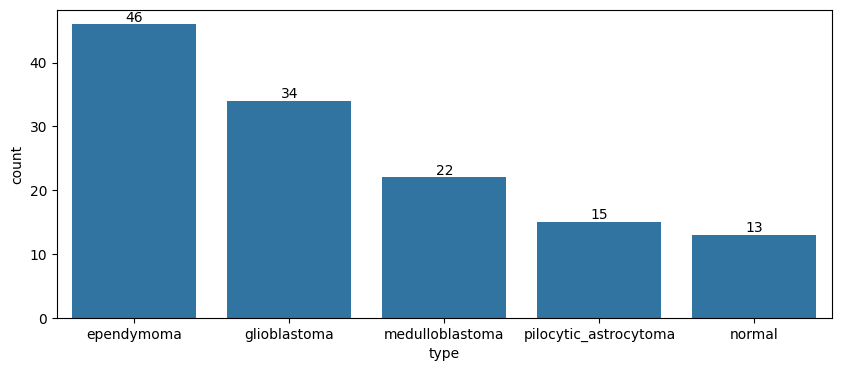

In [8]:
plt.figure(figsize=(10,4))
bar = sns.barplot(df['type'].value_counts())
bar.bar_label(bar.containers[0], fontsize=10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB


In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [11]:
encoder = LabelEncoder()
df['Outcome'] = encoder.fit_transform(df['type'])

In [39]:
df[df['type']=='normal']['Outcome']


102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
111    3
112    3
113    3
114    3
Name: Outcome, dtype: int64

In [13]:
y =df['Outcome']
X = df.drop(columns=['samples','type'])

In [14]:
X.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,Outcome
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,12.276393,8.769583,7.722634,9.160209,4.842069,7.968388,6.800111,6.472452,6.068968,5.548389,...,11.812911,13.793913,13.619041,5.206208,4.811666,3.916795,3.701539,4.627912,4.633377,1.361538
std,0.790160,0.673396,1.037339,0.615369,0.922003,0.630260,0.537431,0.659847,0.904152,0.627754,...,0.618190,0.320124,0.309078,0.220767,0.219851,0.165917,0.180251,0.160663,0.192353,1.358315
min,10.156207,6.627878,6.222515,8.044421,3.682762,6.560920,5.910571,5.515079,4.491771,4.572279,...,9.926470,12.719785,12.777792,4.680072,4.247758,3.530287,3.432622,4.278812,4.050006,0.000000
25%,11.679721,8.378760,7.007678,8.595505,4.207043,7.533713,6.389605,5.935051,5.462356,5.168066,...,11.359850,13.605871,13.392790,5.031176,4.684169,3.807447,3.589381,4.530391,4.519694,0.000000
50%,12.502518,8.786242,7.521674,9.194487,4.462729,7.915062,6.654785,6.401447,5.856087,5.331755,...,11.768853,13.774338,13.614493,5.214618,4.785318,3.912025,3.674620,4.607167,4.603287,1.000000
75%,12.883374,9.211098,8.249157,9.707397,5.276685,8.385912,7.143818,6.985782,6.476124,5.740363,...,12.230375,13.969533,13.813191,5.324326,4.950025,4.009166,3.744824,4.718997,4.736634,2.000000
max,13.655639,10.716003,12.054143,10.407136,7.404503,10.164655,8.110006,8.812959,8.646862,7.607336,...,13.022222,14.476079,14.273778,5.904952,5.619512,4.547821,4.854368,5.420217,5.436919,4.000000


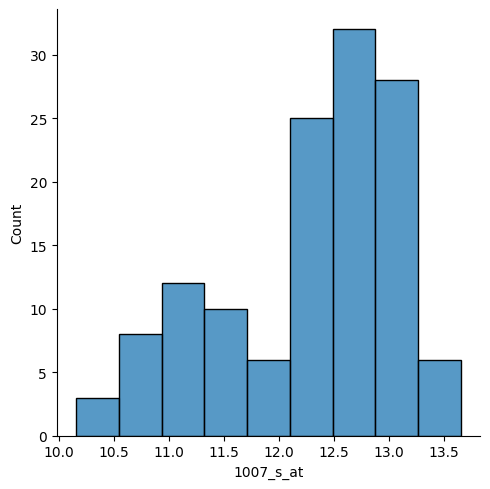

In [18]:
sns.displot(X['1007_s_at'])

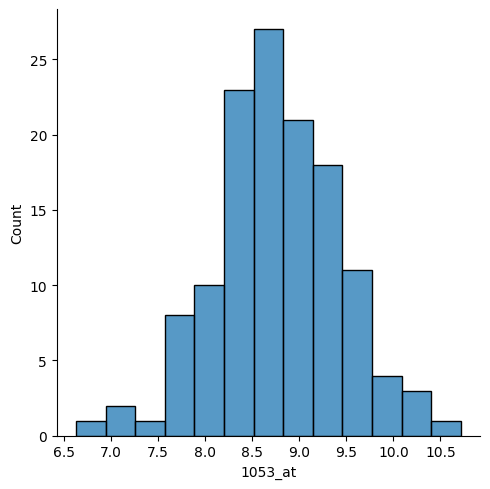

In [19]:
sns.displot(X['1053_at'])

In [20]:
columns = X.columns

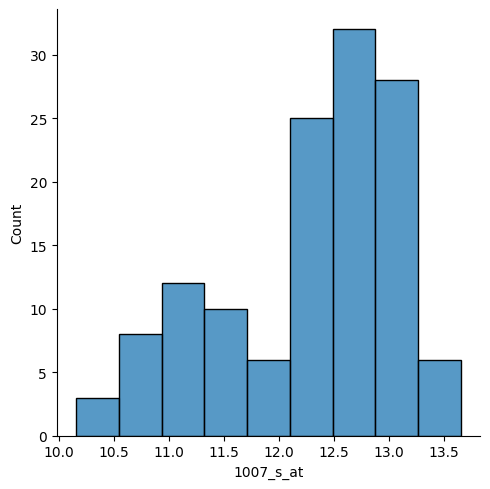

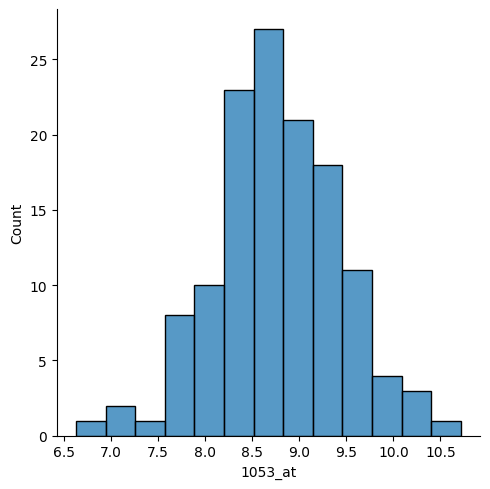

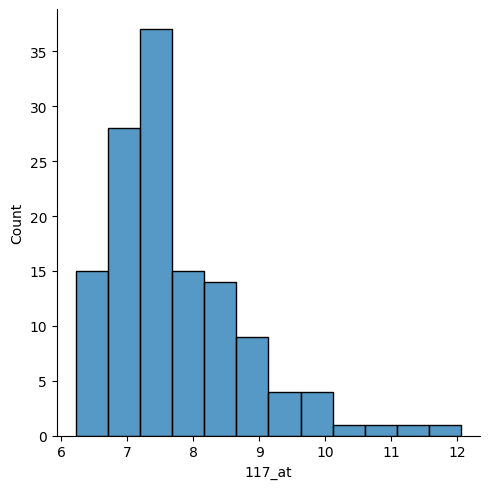

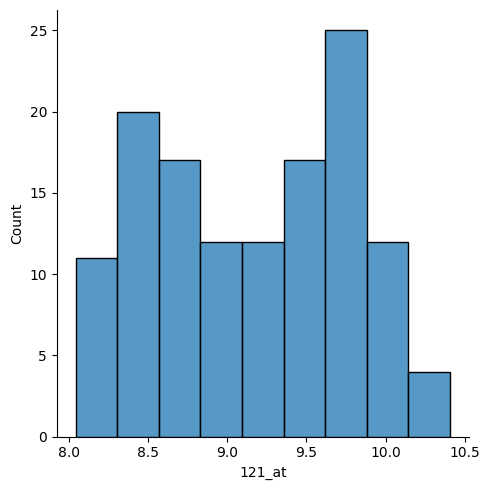

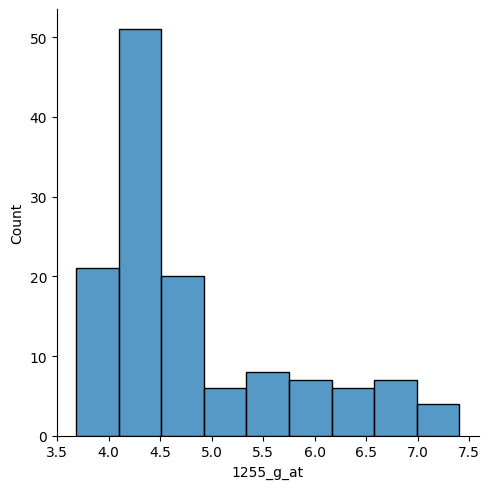

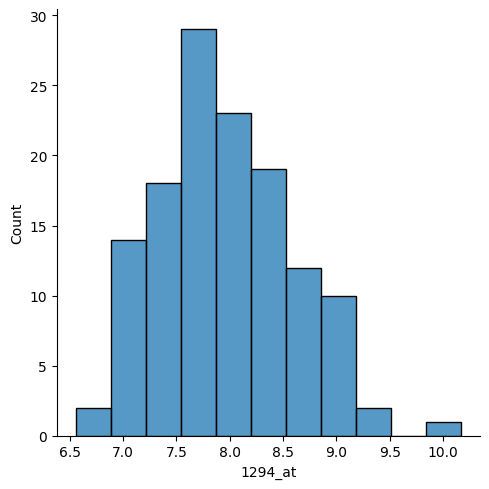

In [21]:
for col in columns[:6]:
    sns.displot(X[col])

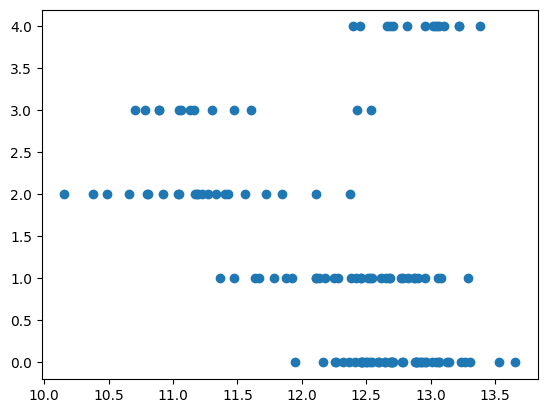

In [27]:
plt.scatter(X['1007_s_at'], y )

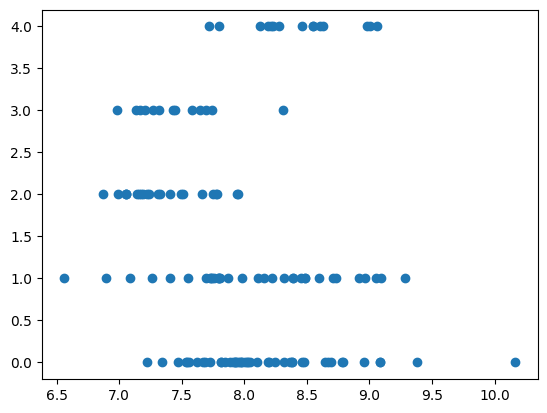

In [28]:
plt.scatter(X['1294_at'], y )

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [53]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [73]:
model = KNeighborsClassifier(n_neighbors=4)

In [74]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [75]:
model.score(X_train,y_train)

0.9230769230769231

In [77]:
model.score(X_test,y_test)

0.9230769230769231

In [65]:
scaler = StandardScaler()

In [66]:
X_scaled = scaler.fit_transform(X)

In [68]:
X_train_scaled , X_test_scaled, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [69]:
model.fit(X_train_scaled, y_train)

SVC()

In [70]:
model.score(X_train_scaled, y_train)

0.8461538461538461